# Bayesian Model analysis

This is a notebook to examine the results from the bayesian models

## Load in whats needed

Load in libraries, sql data and pickle files

In [23]:
from functions.data_functions import save_pickle, load_pickle, load_data
import arviz as az
az.style.use("arviz-darkgrid")

In [24]:
models_summary = load_pickle('saved_models')
fitted_models = load_pickle('fitted_models')
pca_df = load_data('BEACON', 'pca_df')

In [25]:
comp = ['comp_1', 'comp_2','comp_3']
variables = ['Intercept', 'group', 'variable', 'group:variable', 'value_sigma', '1|participants_sigma']

## Examine the priors

In [26]:
models_summary['alt']['comp_1'].split('\n')

['Formula: value ~ group * variable + (1|participants)',
 'Family name: Gaussian',
 'Link: identity',
 'Observations: 268',
 'Priors:',
 '  Common-level effects',
 '    Intercept ~ Normal(mu: 0.0, sigma: 9.7041)',
 '    group ~ Normal(mu: 0.0, sigma: 13.1492)',
 '    variable ~ Normal(mu: 0.0, sigma: 12.0342)',
 '    group:variable ~ Normal(mu: 0.0, sigma: 16.886)',
 '',
 '  Group-level effects',
 '    1|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 9.7041))',
 '',
 '  Auxiliary parameters',
 '    sigma ~ HalfStudentT(nu: 4, sigma: 2.4068)']

In [27]:
models_summary['alt']['comp_2'].split('\n')

['Formula: value ~ group * variable + (1|participants)',
 'Family name: Gaussian',
 'Link: identity',
 'Observations: 268',
 'Priors:',
 '  Common-level effects',
 '    Intercept ~ Normal(mu: -0.0, sigma: 4.16)',
 '    group ~ Normal(mu: 0.0, sigma: 5.6368)',
 '    variable ~ Normal(mu: 0.0, sigma: 5.1589)',
 '    group:variable ~ Normal(mu: 0.0, sigma: 7.2387)',
 '',
 '  Group-level effects',
 '    1|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 4.16))',
 '',
 '  Auxiliary parameters',
 '    sigma ~ HalfStudentT(nu: 4, sigma: 1.0318)']

In [28]:
models_summary['alt']['comp_3'].split('\n')

['Formula: value ~ group * variable + (1|participants)',
 'Family name: Gaussian',
 'Link: identity',
 'Observations: 268',
 'Priors:',
 '  Common-level effects',
 '    Intercept ~ Normal(mu: 0.0, sigma: 3.8379)',
 '    group ~ Normal(mu: 0.0, sigma: 5.2004)',
 '    variable ~ Normal(mu: 0.0, sigma: 4.7595)',
 '    group:variable ~ Normal(mu: 0.0, sigma: 6.6783)',
 '',
 '  Group-level effects',
 '    1|participants ~ Normal(mu: 0, sigma: HalfNormal(sigma: 3.8379))',
 '',
 '  Auxiliary parameters',
 '    sigma ~ HalfStudentT(nu: 4, sigma: 0.9519)']

## Summarize the models

### For the alternative hypothesis

In [29]:
az.summary(fitted_models['alt']['comp_1'], var_names=variables, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,1.063,0.203,0.686,1.443
group[HC],-3.574,0.370,-4.285,-2.898
variable[t2],-0.271,0.188,-0.606,0.109
"group:variable[HC, t2]",0.910,0.345,0.244,1.549
value_sigma,1.270,0.079,1.123,1.419
1|participants_sigma,1.492,0.131,1.255,1.750


In [30]:
az.summary(fitted_models['alt']['comp_2'], var_names=variables, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,-0.010,0.107,-0.207,0.196
group[HC],0.036,0.198,-0.329,0.409
variable[t2],0.080,0.110,-0.136,0.278
"group:variable[HC, t2]",-0.271,0.198,-0.640,0.099
value_sigma,0.757,0.048,0.667,0.844
1|participants_sigma,0.718,0.073,0.583,0.858


In [31]:
az.summary(fitted_models['alt']['comp_3'], var_names=variables, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,-0.200,0.092,-0.371,-0.024
group[HC],0.674,0.168,0.358,0.987
variable[t2],-0.045,0.084,-0.196,0.117
"group:variable[HC, t2]",0.149,0.153,-0.135,0.439
value_sigma,0.572,0.035,0.509,0.641
1|participants_sigma,0.694,0.061,0.584,0.811


### For the null hypothesis

In [32]:
az.summary(fitted_models['null']['comp_3'], var_names=['1|participants_sigma'], kind='stats')

,mean,sd,hdi_3%,hdi_97%
1|participants_sigma,0.773,0.062,0.663,0.896


In [33]:
az.summary(fitted_models['null']['comp_3'], var_names=['1|participants_sigma'], kind='stats')

,mean,sd,hdi_3%,hdi_97%
1|participants_sigma,0.773,0.062,0.663,0.896


In [34]:
az.summary(fitted_models['null']['comp_3'], var_names=['1|participants_sigma'], kind='stats')

,mean,sd,hdi_3%,hdi_97%
1|participants_sigma,0.773,0.062,0.663,0.896


## Model comparison

The ELPD results for model comparison

/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                    rank    elpd_loo       p_loo  elpd_diff    weight  \
alternative_comp_1     0 -506.782949   94.019171   0.000000  0.844833   
null_comp_1            1 -519.041355  102.906937  12.258406  0.155167   

                           se      dse  warning scale  
alternative_comp_1  12.448020  0.00000     True   log  
null_comp_1         10.837901  6.31313     True   log  


/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                    rank    elpd_loo      p_loo  elpd_diff    weight  \
null_comp_2            0 -358.116499  81.508927   0.000000  0.960744   
alternative_comp_2     1 -359.620001  83.476369   1.503502  0.039256   

                           se       dse  warning scale  
null_comp_2         14.564794  0.000000     True   log  
alternative_comp_2  14.575103  1.806229     True   log  


/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                    rank    elpd_loo      p_loo  elpd_diff    weight  \
alternative_comp_3     0 -294.255268  95.453641   0.000000  0.618533   
null_comp_3            1 -295.537171  98.323877   1.281903  0.381467   

                           se       dse  warning scale  
alternative_comp_3  13.178620  0.000000     True   log  
null_comp_3         13.955219  3.277468     True   log  


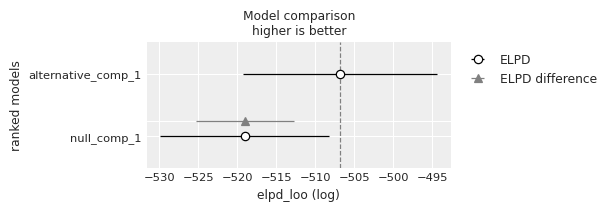

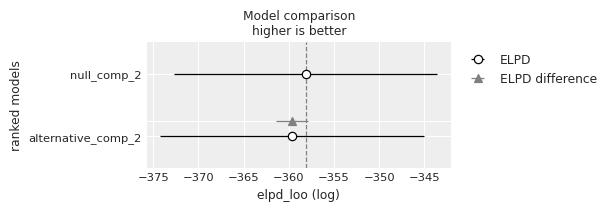

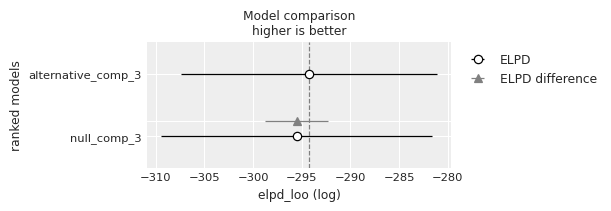

In [35]:
for component in comp:
    az_comparison = az.compare({f'null_{component}' : fitted_models['null'][component], f'alternative_{component}': fitted_models['alt'][component]})
    print(az_comparison)
    az.plot_compare(az_comparison)

## Examining the posterior distribution

Extracting the posterior distribution for an at t1/t2 and hc at t1/t2

**TODO** Change graph titles to be more informative

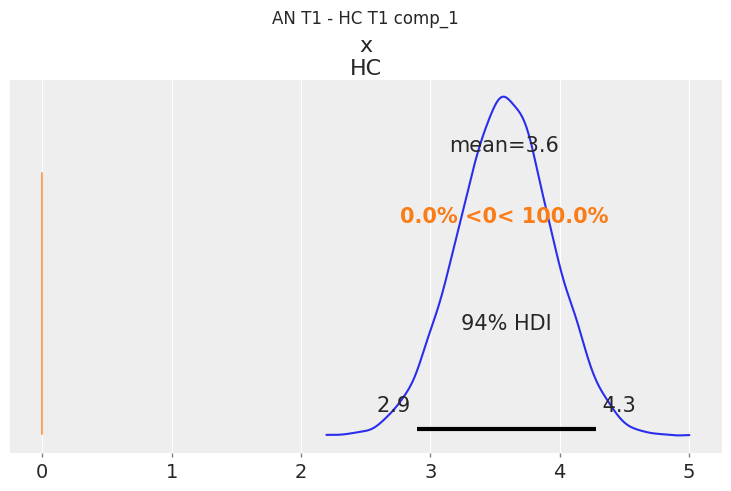

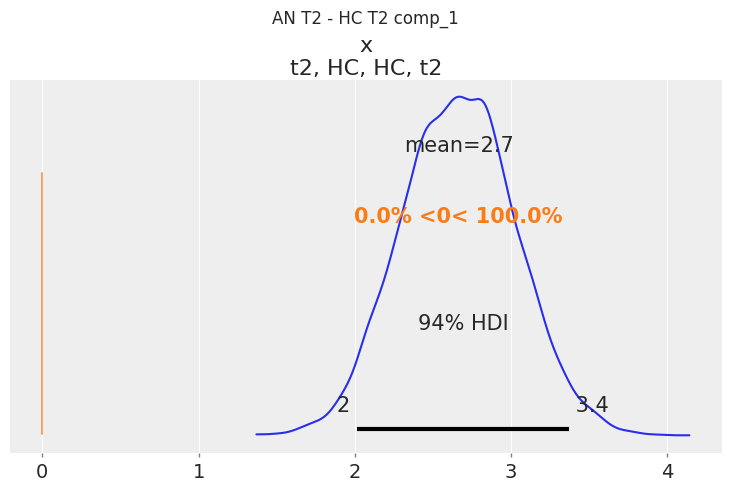

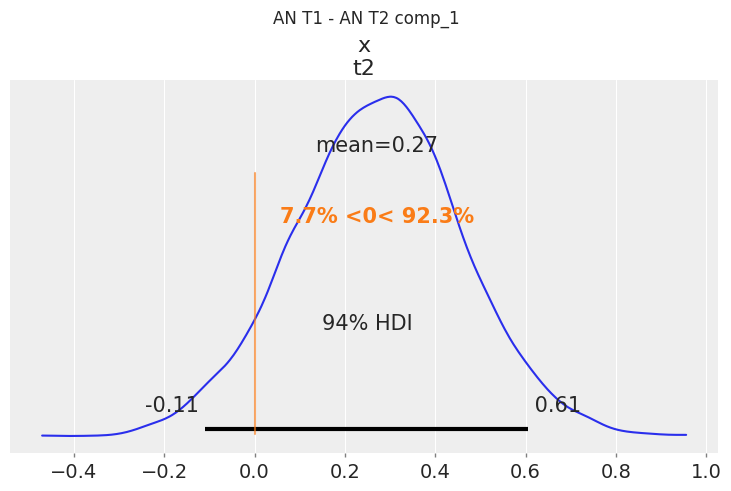

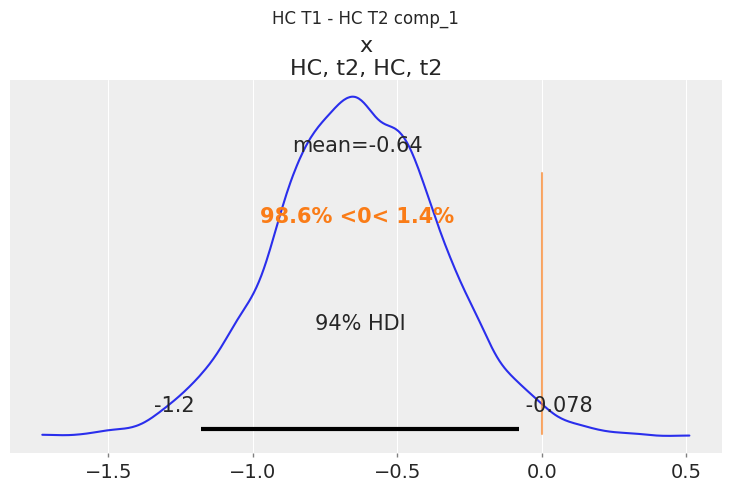

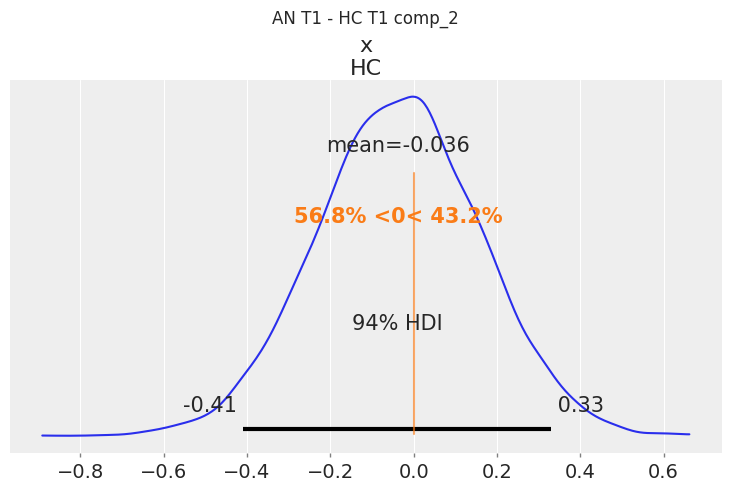

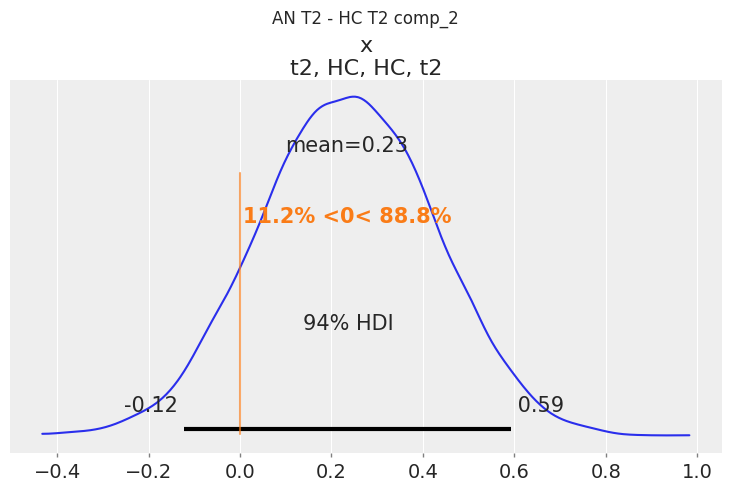

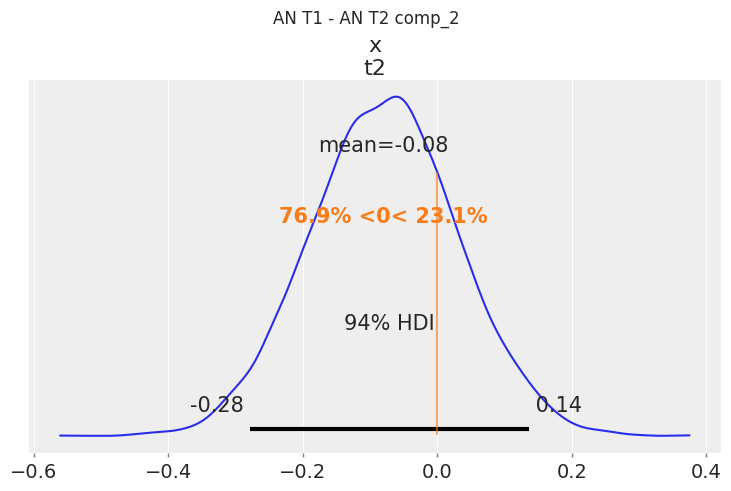

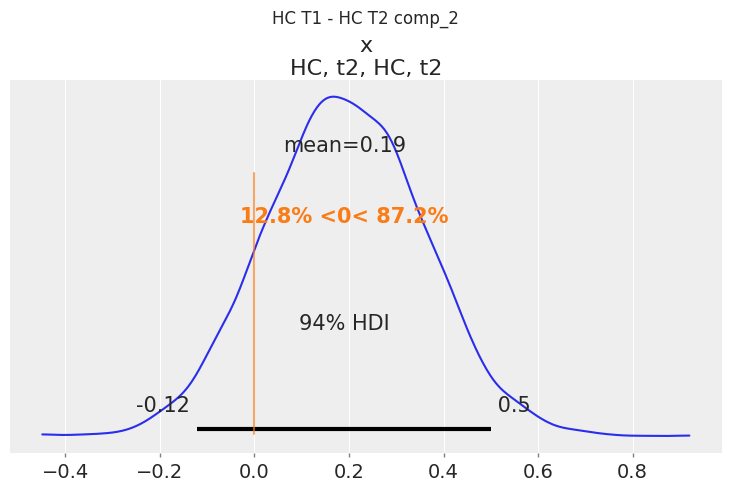

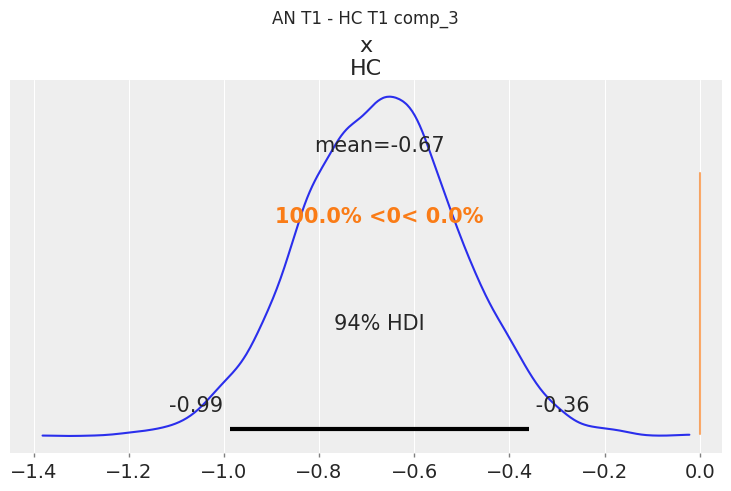

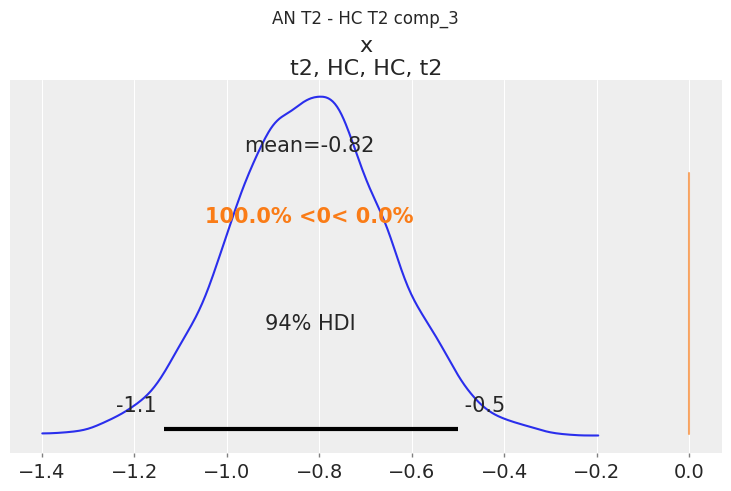

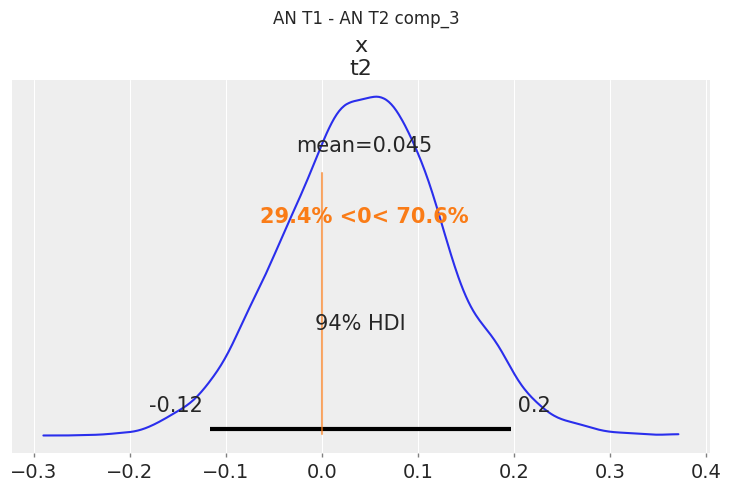

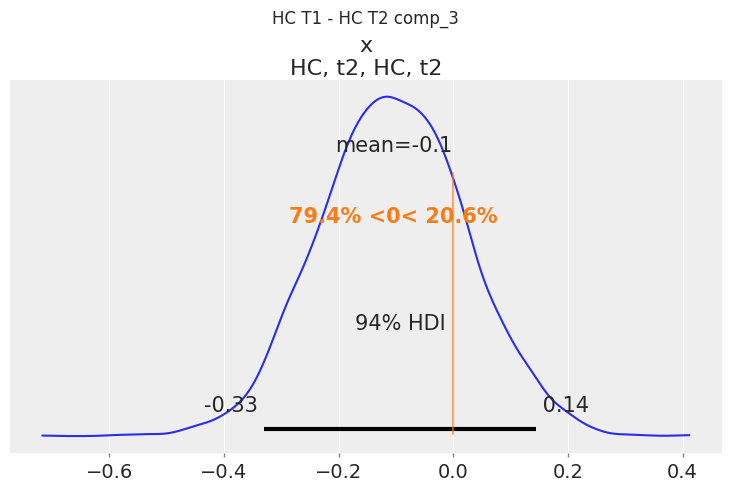

In [36]:
import arviz.labels as azl 

pred_summary = {
   'comp_1': {},
   'comp_2': {},
   'comp_3': {},
}

for component in comp:
   an_t1 = fitted_models['alt'][component].posterior["Intercept"]
   hc_t1 = fitted_models['alt'][component].posterior["Intercept"] + fitted_models['alt'][component].posterior["group"]
   an_t2 = fitted_models['alt'][component].posterior["Intercept"] + fitted_models['alt'][component].posterior["variable"]
   hc_t2 = fitted_models['alt'][component].posterior["Intercept"] + fitted_models['alt'][component].posterior["variable"] + fitted_models['alt'][component].posterior["group"] +  fitted_models['alt'][component].posterior["group:variable"]
   
   pred_summary[component]['an_t1'] = az.summary(an_t1, kind='stats', labeller=azl.MapLabeller(var_name_map={"Intercept": "t1[AN]"}))
   pred_summary[component]['hc_t1'] = az.summary(hc_t1, kind='stats', labeller=azl.MapLabeller(var_name_map={"x": "t1"}))
   pred_summary[component]['an_t2'] = az.summary(an_t2, kind='stats',labeller=azl.MapLabeller(var_name_map={"x": "AN"}))
   pred_summary[component]['hc_t2'] = az.summary(hc_t2, kind='stats')

   diff_t1 = an_t1 - hc_t1
   diff_t2 = an_t2 - hc_t2
   diff_an = an_t1 - an_t2
   diff_hc = hc_t1 - hc_t2

   ax_1 = az.plot_posterior(diff_t1, ref_val=0)
   fig_1 = ax_1.get_figure()
   fig_1.suptitle(f'AN T1 - HC T1 {component}')
   ax_2 = az.plot_posterior(diff_t2, ref_val=0)
   fig_2 = ax_2.get_figure()
   fig_2.suptitle(f'AN T2 - HC T2 {component}')
   ax_3 = az.plot_posterior(diff_an, ref_val=0)
   fig_3 = ax_3.get_figure()
   fig_3.suptitle(f'AN T1 - AN T2 {component}')
   ax_4 = az.plot_posterior(diff_hc, ref_val=0)
   fig_4 = ax_4.get_figure()
   fig_4.suptitle(f'HC T1 - HC T2 {component}')

Get a summary of the an t1/t2 & hc t1/t2 distributions

In [42]:
print(pred_summary['comp_1']['an_t1'], '\n')
print(pred_summary['comp_1']['an_t2'], '\n')
print(pred_summary['comp_1']['hc_t1'], '\n')
print(pred_summary['comp_1']['hc_t2'], '\n')

         mean     sd  hdi_3%  hdi_97%
t1[AN]  1.063  0.203   0.686    1.443 

         mean     sd  hdi_3%  hdi_97%
AN[t2]  0.793  0.202   0.423    1.182 

         mean     sd  hdi_3%  hdi_97%
t1[HC] -2.511  0.312  -3.106    -1.94 

                    mean     sd  hdi_3%  hdi_97%
x[t2, HC, HC, t2] -1.872  0.311  -2.456    -1.29 



In [43]:
print(pred_summary['comp_2']['an_t1'], '\n')
print(pred_summary['comp_2']['an_t2'], '\n')
print(pred_summary['comp_2']['hc_t1'], '\n')
print(pred_summary['comp_2']['hc_t2'], '\n')

        mean     sd  hdi_3%  hdi_97%
t1[AN] -0.01  0.107  -0.207    0.196 

         mean     sd  hdi_3%  hdi_97%
AN[t2]  0.069  0.106  -0.125    0.272 

         mean     sd  hdi_3%  hdi_97%
t1[HC]  0.026  0.166  -0.293     0.33 

                    mean     sd  hdi_3%  hdi_97%
x[t2, HC, HC, t2] -0.165  0.164  -0.464    0.153 



In [44]:
print(pred_summary['comp_3']['an_t1'], '\n')
print(pred_summary['comp_3']['an_t2'], '\n')
print(pred_summary['comp_3']['hc_t1'], '\n')
print(pred_summary['comp_3']['hc_t2'], '\n')

        mean     sd  hdi_3%  hdi_97%
t1[AN]  -0.2  0.092  -0.371   -0.024 

         mean     sd  hdi_3%  hdi_97%
AN[t2] -0.244  0.092  -0.415   -0.071 

         mean     sd  hdi_3%  hdi_97%
t1[HC]  0.474  0.142   0.203    0.734 

                    mean     sd  hdi_3%  hdi_97%
x[t2, HC, HC, t2]  0.578  0.144   0.308    0.848 

